In [1]:
import pathlib as Path
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 100)

In C:\Users\jbrun\AppData\Roaming\Python\Python37\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\jbrun\AppData\Roaming\Python\Python37\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\jbrun\AppData\Roaming\Python\Python37\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\jbrun\AppData\Roaming\Python\Python37\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\jbrun\Ap

In [7]:
from pathlib import Path
path_1 = Path(r'C:\Users\jbrun\Desktop\UA 2020\Spring\OM 597 (Seminar)\Python\data')
data = pd.read_csv(path_1.joinpath('viz_data.csv'), index_col=0).reset_index()
print(data)


C:\Users\jbrun\AppData\Roaming\Python\Python37\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


           index                   Week County  \
0              0  2017-11-27/2017-12-03  Adair   
1              1  2017-11-27/2017-12-03  Adair   
2              2  2017-11-27/2017-12-03  Adair   
3              3  2017-11-27/2017-12-03  Adair   
4              4  2017-11-27/2017-12-03  Adair   
...          ...                    ...    ...   
1308260  1308260  2020-11-30/2020-12-06  Worth   
1308261  1308261  2020-11-30/2020-12-06  Worth   
1308262  1308262  2020-11-30/2020-12-06  Worth   
1308263  1308263  2020-11-30/2020-12-06  Worth   
1308264  1308264  2020-11-30/2020-12-06  Worth   

                          Category Name               Vendor Name  \
0                     American Brandies                 Luxco Inc   
1          American Cordials & Liqueurs  Cedar Ridge Vineyards Ll   
2                     American Dry Gins         Pernod Ricard Usa   
3               American Flavored Vodka         Phillips Beverage   
4                     American Schnapps           Jim 

In [8]:
data.head()

,index,Week,County,Category Name,Vendor Name,Volume Sold (Liters),Volume Sold (Gallons),Bottles Sold,Week Start
0,0,2017-11-27/2017-12-03,Adair,American Brandies,Luxco Inc,54.00,14.27,72,2017-11-27
1,1,2017-11-27/2017-12-03,Adair,American Cordials & Liqueurs,Cedar Ridge Vineyards Ll,1.50,0.40,2,2017-11-27
2,2,2017-11-27/2017-12-03,Adair,American Dry Gins,Pernod Ricard Usa,1.50,0.40,2,2017-11-27
3,3,2017-11-27/2017-12-03,Adair,American Flavored Vodka,Phillips Beverage,4.50,1.18,6,2017-11-27
4,4,2017-11-27/2017-12-03,Adair,American Schnapps,Jim Beam Brands,14.25,3.76,19,2017-11-27


In [9]:
data['Week Start'] = pd.to_datetime(data['Week Start'])

In [10]:
data.dtypes

index                             int64
Week                             object
County                           object
Category Name                    object
Vendor Name                      object
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
Bottles Sold                      int64
Week Start               datetime64[ns]
dtype: object

In [11]:
data.head()

,index,Week,County,Category Name,Vendor Name,Volume Sold (Liters),Volume Sold (Gallons),Bottles Sold,Week Start
0,0,2017-11-27/2017-12-03,Adair,American Brandies,Luxco Inc,54.00,14.27,72,2017-11-27
1,1,2017-11-27/2017-12-03,Adair,American Cordials & Liqueurs,Cedar Ridge Vineyards Ll,1.50,0.40,2,2017-11-27
2,2,2017-11-27/2017-12-03,Adair,American Dry Gins,Pernod Ricard Usa,1.50,0.40,2,2017-11-27
3,3,2017-11-27/2017-12-03,Adair,American Flavored Vodka,Phillips Beverage,4.50,1.18,6,2017-11-27
4,4,2017-11-27/2017-12-03,Adair,American Schnapps,Jim Beam Brands,14.25,3.76,19,2017-11-27


# Sales by Vendor

In [40]:
unique_vendors = data['Vendor Name'].unique().tolist()

current_vendor = unique_vendors[0]
current_vendor

'Luxco Inc'

In [15]:
myfilter = data['Vendor Name'] == current_vendor
vendor_data = data[myfilter]
vendor_data.groupby(['Week Start'])['Volume Sold (Gallons)'].sum().reset_index()

,Week Start,Volume Sold (Gallons)
0,2017-11-27,4130.53
1,2017-12-04,12042.60
2,2017-12-11,12090.73
3,2017-12-18,14905.92
4,2017-12-25,9324.41
...,...,...
153,2020-11-02,10938.11
154,2020-11-09,8878.29
155,2020-11-16,9897.74
156,2020-11-23,8845.21


In [22]:
import seaborn as sns
sns.set_style('whitegrid')

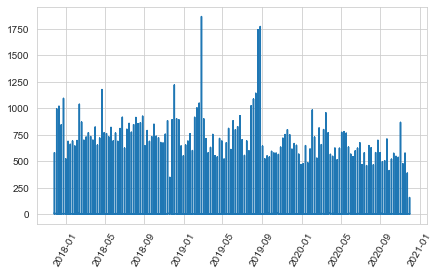

In [23]:
fig, ax = plt.subplots(1, 1, figsize = (7,4))

ax.plot(vendor_data['Week Start'],
        vendor_data['Volume Sold (Gallons)'])
ax.tick_params(axis = 'x' ,rotation = 60)
plt.show()

In [26]:
current_vendor1 = unique_vendors[0]
current_vendor2 = unique_vendors[1]

myfilter = data['Vendor Name'] == current_vendor1
vendor1_data = data[myfilter]
vendor1_data = vendor1_data.groupby(['Week Start'])['Volume Sold (Gallons)'].sum().reset_index()

myfilter = data['Vendor Name'] == current_vendor2
vendor2_data = data[myfilter]
vendor2_data = vendor_data2.groupby(['Week Start'])['Volume Sold (Gallons)'].sum().reset_index()

In [27]:
current_vendor2

'Cedar Ridge Vineyards Ll'

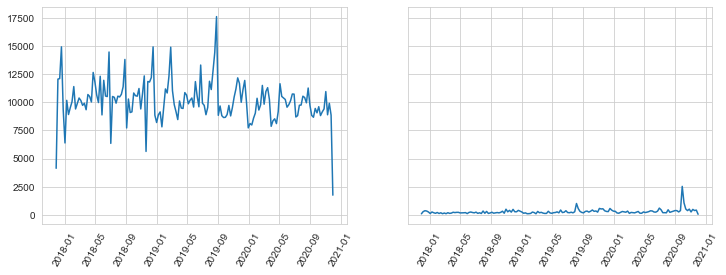

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4), sharey = True)

ax[0].plot(vendor1_data['Week Start'],
        vendor1_data['Volume Sold (Gallons)'])
ax[0].tick_params(axis = 'x' ,rotation = 60)

ax[1].plot(vendor2_data['Week Start'],
        vendor2_data['Volume Sold (Gallons)'])
ax[1].tick_params(axis = 'x' ,rotation = 60)
plt.show()

In [41]:
def comparison_plot(current_vendor1, current_vendor2):
    
    current_selections = [current_vendor1, current_vendor2]

    fig, ax = plt.subplots(1, 2, figsize = (12, 4), sharey = True)

    for selection, current_axis in zip(current_selections, ax):

        myfilter = data['Vendor Name'] == current_vendor1
        vendor_data = data[myfilter]
        vendor_data = vendor_data.groupby(['Week Start'])['Volume Sold (Gallons)'].sum().reset_index()

        current_axis.plot(vendor_data['Week Start'],
                vendor_data['Volume Sold (Gallons)'])

        current_axis.tick_params(axis = 'x' ,rotation = 60)
        current_axis.set_title(f'Weekly Sales for {selection})', fontsize = 14)

plt.show()

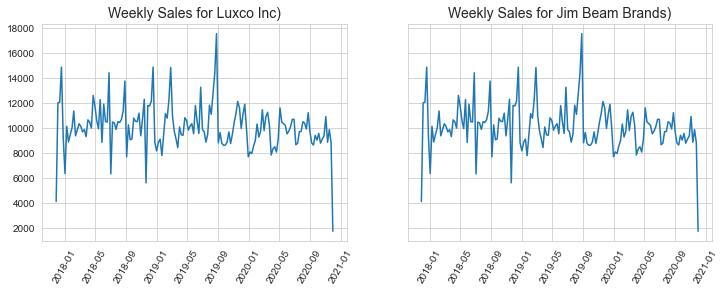

In [42]:
current_vendor1 = unique_vendors[0]
current_vendor2 = unique_vendors[4]
comparison_plot(current_vendor1, current_vendor2)

In [43]:
from ipywidgets import interact

In [44]:
interact(comparison_plot, current_vendor1 = unique_vendors, current_vendor2 = unique_vendors)

interactive(children=(Dropdown(description='current_vendor1', options=('Luxco Inc', 'Cedar Ridge Vineyards Ll'…

<function __main__.comparison_plot(current_vendor1, current_vendor2)>